In [15]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
import numpy as np

%matplotlib inline

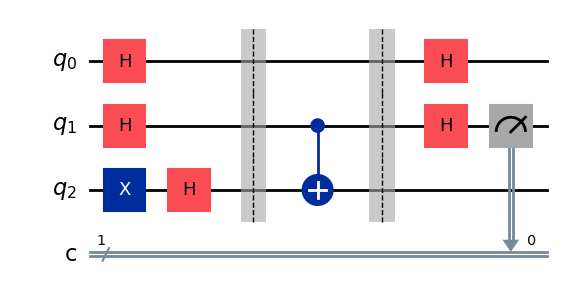

In [16]:
qc = QuantumCircuit(3, 1)

qc.h(0)
qc.h(1)

qc.x(2)
qc.h(2)

qc.barrier()

qc.cx(1, 2)

qc.barrier()

qc.h(0)
qc.h(1)

#qc.measure(0, 0)
qc.measure(1, 0)

qc.draw(output='mpl')

{'1': 1024}


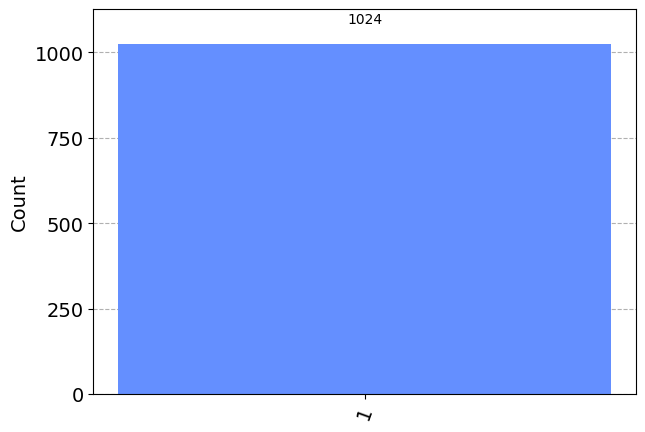

In [17]:
simulator = BasicSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
print(result.get_counts())
plot_histogram(result.get_counts())

In [63]:



HxI = np.array([
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, -1, 0],
    [0, 1, 0, -1]
])

v = np.array([
    [1],
    [0],
    [1],
    [0]
])

In [64]:
s0 = np.dot(h0, v)
print(s0)

[[1]
 [1]
 [1]
 [0]]


In [65]:
norm = 1 / np.sqrt(4)
print(norm)

0.5


In [58]:
ns0 = s0 * norm
print(ns0)

[[0.5]
 [0.5]
 [0.5]
 [0. ]]


In [59]:
x1 = [[1, 0, 0, 0],
     [0, 1, 0, 0],
     [0, 0, 0, 1],
     [0, 0, 1, 0]]

In [60]:
s1 = np.dot(x1, s0)
print(s1)

[[1]
 [1]
 [0]
 [1]]


In [67]:
def tensor_product(matrix1, matrix2):
    """
    Computes the tensor product (Kronecker product) of two matrices.

    Parameters:
    matrix1 (numpy.ndarray): First matrix.
    matrix2 (numpy.ndarray): Second matrix.

    Returns:
    numpy.ndarray: The tensor product of the two matrices.
    """
    return np.kron(matrix1, matrix2)

# Example usage:
A = np.array([[1, 1], [1, -1]])
B = np.array([[1, 0], [0, 1]])

result = tensor_product(A, B)
print(result)

[[ 1  0  1  0]
 [ 0  1  0  1]
 [ 1  0 -1  0]
 [ 0  1  0 -1]]


In [70]:
def measure(statevector):
    """
    Measure a qubit statevector into a classical bit.

    Parameters:
    statevector (numpy.ndarray): A 2-element complex vector representing the qubit state.

    Returns:
    int: The measurement result (0 or 1).
    """
    # Ensure the statevector is normalized
    assert np.isclose(np.linalg.norm(statevector), 1), "Statevector must be normalized"

    # Compute probabilities
    prob_0 = np.abs(statevector[0])**2
    prob_1 = np.abs(statevector[1])**2

    # Generate a random number to simulate measurement
    random_number = np.random.rand()

    # Determine the measurement result
    if random_number < prob_0:
        return 0
    else:
        return 1

# Example usage
statevector = np.array([0.6 + 0j, 0.8 + 0j]) / np.sqrt(0.6**2 + 0.8**2)  # normalized statevector
measurement_result = measure(statevector)
print(f"Measurement result: {measurement_result}")

Measurement result: 1


In [71]:
def measure(statevector):
    """
    Measure a multi-qubit statevector into a classical bitstring.

    Parameters:
    statevector (numpy.ndarray): A 2^n-element complex vector representing the n-qubit state.

    Returns:
    str: The measurement result as a bitstring.
    """
    # Ensure the statevector is normalized
    assert np.isclose(np.linalg.norm(statevector), 1), "Statevector must be normalized"

    # Compute the probabilities of each basis state
    probabilities = np.abs(statevector)**2

    # Generate a random number to simulate measurement
    random_number = np.random.rand()

    # Determine the measurement result
    cumulative_probability = 0.0
    for i, probability in enumerate(probabilities):
        cumulative_probability += probability
        if random_number < cumulative_probability:
            # Convert the index to a bitstring
            num_qubits = int(np.log2(len(statevector)))
            bitstring = format(i, f'0{num_qubits}b')
            return bitstring

# Example usage
statevector = np.array([0.2 + 0j, 0.2 + 0j, 0.6 + 0j, 0.2 + 0j]) / np.sqrt(0.2**2 + 0.2**2 + 0.6**2 + 0.2**2)  # normalized statevector for 2 qubits
measurement_result = measure(statevector)
print(f"Measurement result: {measurement_result}")


Measurement result: 10
